# Import data

In [3]:
import pandas as pd
import numpy as np

sales = pd.read_csv("data_processed.csv")
sales

,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,functionality_2,functionality_3,functionality_4,functionality_5,functionality_6,functionality_7,functionality_8,functionality_9,functionality_10,functionality_11,functionality_12,color_blue,color_gold,color_green,color_grey,color_none,color_pink,color_purple,color_red,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
0,2016-11-14,1,110.0,10.24,9.86,10.16,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2016-11-21,1,127.0,8.27,10.24,9.86,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2016-11-28,1,84.0,8.83,8.27,10.24,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2016-12-05,1,87.0,8.98,8.83,8.27,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2016-12-12,1,64.0,10.40,8.98,8.83,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,2018-08-27,44,20.0,53.99,42.38,43.99,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4308,2018-09-03,44,14.0,52.99,53.99,42.38,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4309,2018-09-10,44,22.0,44.99,52.99,53.99,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4310,2018-09-17,44,28.0,42.99,44.99,52.99,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [4]:
import pandas as pd
res = pd.read_csv('results.csv')
res

,Centralized,Decentralized,Decentralized Lasso,Decentralized Ridge,Decentralized Elasticnet,Decentralized Log Lin,Decentralized Log Log,Centralized DT,Decentralized DT,Centralized RF,Decentralized RF,Centralized GB,Decentralized GB,K-means,DBSCAN
0,0.114249,0.516539,0.522894,0.570888,0.584669,0.558297,0.199689,0.159197,0.398779,0.272476,0.558817,0.222851,0.496599,0.560435,0.559224


# V/ Evaluation and conclusion

## 1. Summary of Results

In [5]:
results=pd.DataFrame()
results['model']=res.columns
results['OOS R2']=res.values.tolist()[0]
results['method-type']=['Traditional','Traditional','Traditional','Traditional','Traditional','Traditional','Traditional',
                 'Tree-based','Tree-based','Tree-based','Tree-based','Tree-based','Tree-based',
                 'Clustering','Clustering']
results

,model,OOS R2,method-type
0,Centralized,0.114249,Traditional
1,Decentralized,0.516539,Traditional
2,Decentralized Lasso,0.522894,Traditional
3,Decentralized Ridge,0.570888,Traditional
4,Decentralized Elasticnet,0.584669,Traditional
5,Decentralized Log Lin,0.558297,Traditional
6,Decentralized Log Log,0.199689,Traditional
7,Centralized DT,0.159197,Tree-based
8,Decentralized DT,0.398779,Tree-based
9,Centralized RF,0.272476,Tree-based


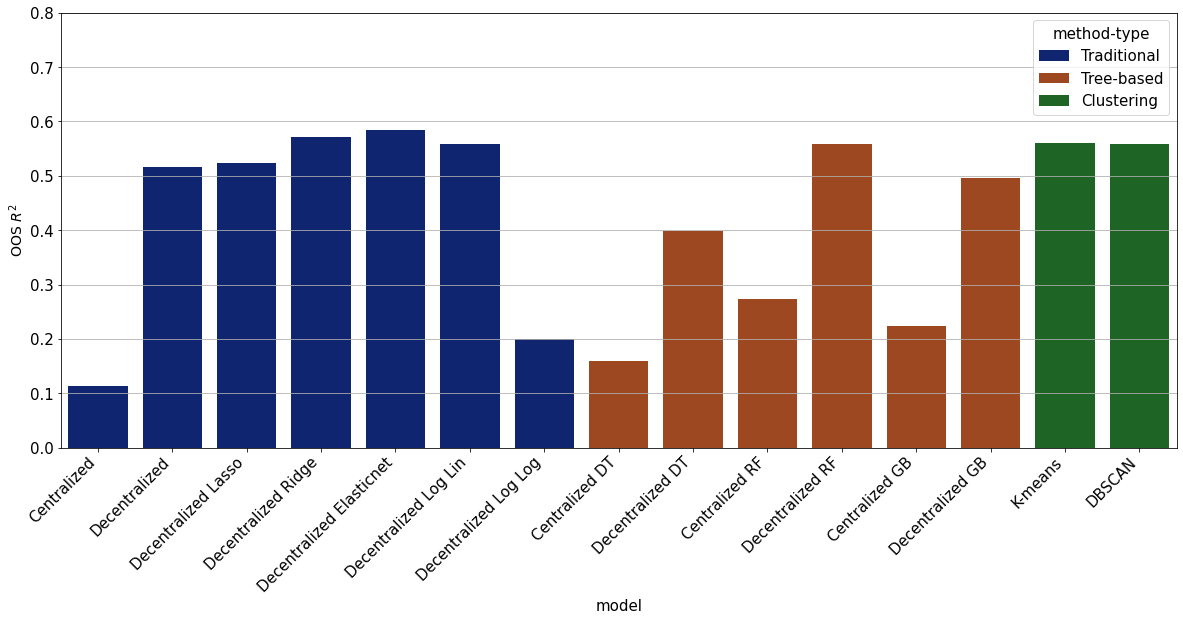

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize=(20,8))

g = sns.barplot(data=results, x='model', y='OOS R2', ax=ax, hue='method-type', palette='dark', dodge=False)
ax.set_ylabel('OOS $R^2$', size = 14)
ax.set_xticklabels(list(res.columns),
                   rotation=45,ha='right')

ax.set_ylim([0,0.8])
ax.yaxis.grid(True)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("results_plot.png",dpi=400,bbox_inches = 'tight')
plt.show()

## 2. Prediction vs. Actual

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


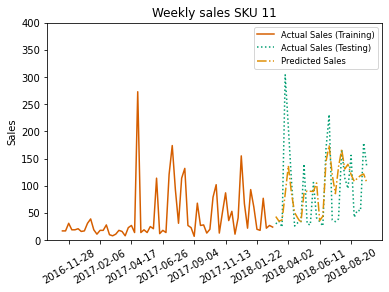

In [7]:
data = sales[sales.sku==11].sort_values(by=["week"])
colnames = [i for i in data.columns if i not in ["week","weekly_sales","sku"]]
data

X_primer = data[colnames]
y_primer = data.weekly_sales

X_train_primer,X_test_primer = np.split(X_primer, [int(0.70 *98)])
y_train_primer, y_test_primer = np.split(y_primer, [int(0.70 *98)])


from statsmodels.regression.linear_model import OLS
model = OLS(y_train_primer, X_train_primer)
model = model.fit()
y_pred_primer = list(model.predict(X_test_primer))



plt.rcParams.update({'font.size': 10})

plt.title('Weekly sales SKU 11')
plt.ylabel("Sales")

plt.plot(data.iloc[:68]["week"],y_train_primer,label="Actual Sales (Training)",color=sns.color_palette(palette='colorblind')[3])
plt.plot(data.iloc[68:]["week"],y_test_primer,label="Actual Sales (Testing)",color=sns.color_palette(palette='colorblind')[2],linestyle="dotted")
plt.plot(data.iloc[68:]["week"],y_pred_primer,color=sns.color_palette(palette='colorblind')[1],label="Predicted Sales",linestyle='dashdot')

plt.legend(loc='upper right',fontsize='small')

plt.ylim([0,400])
locs, labels=plt.xticks()
x_ticks = []
plt.xticks(locs[2::10],data.week[2::10], rotation=30)


plt.show()

In [8]:
skuSet = list(sales.sku.unique())
skuData = {}
colnames = [i for i in sales.columns if i not in ["week","weekly_sales","sku"]]
for i in skuSet:
  df_i = sales[sales.sku == i]
  skuData[i] = {'X': df_i[colnames].values,
                'y': df_i.weekly_sales.values}

In [9]:
X_dict = {}
y_dict = {}

skuModels = {}
y_pred = []
y_test = []
y_train = []

for i in skuSet:
  
  X_train_i,X_test_i = np.split(skuData[i]["X"], [68]) #split for X
  y_train_i,y_test_i = np.split(skuData[i]["y"], [68]) #split for y 

  X_dict[i] = {'train': X_train_i, 'test': X_test_i} #filling dictionary
  y_dict[i] = {'train': y_train_i, 'test': y_test_i}

  y_test += list(y_test_i) #creating the complete training array
  y_train += list(y_train_i) #creating the complete testing array

In [10]:
df_test =pd.DataFrame()
df_test["actual"]=y_test
df_test["week"] = list(data.iloc[68:].week)*len(skuSet)
df_test

,actual,week
0,14.0,2018-03-05
1,29.0,2018-03-12
2,26.0,2018-03-19
3,16.0,2018-03-26
4,28.0,2018-04-02
...,...,...
1315,20.0,2018-08-27
1316,14.0,2018-09-03
1317,22.0,2018-09-10
1318,28.0,2018-09-17


### Decentralized ElasticNet

In [11]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

y_pred = []
skuModelsElastic = {}

for i in skuSet:
  elastic = ElasticNet(alpha= 0.05,l1_ratio=0.3)
  skuModelsElastic[i] = elastic.fit(X_dict[i]["train"],y_dict[i]["train"])
  y_pred += list(skuModelsElastic[i].predict(X_dict[i]['test']))

print('Out of sample R2:',round(r2_score(y_test, np.array(y_pred)),3))
print('MSE:', round(mean_squared_error(y_test, np.array(y_pred)),3))


Out of sample R2: 0.585
MSE: 45992.958


In [12]:
df_test["decentralized_elasticnet"] = y_pred

### Clustering

In [14]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
scaler = MinMaxScaler()

#Clustering
z = 5
X_clus = np.zeros((len(skuSet), 4))
count = 0
for sku in skuSet:
    X_clus[count, :] = np.concatenate( (np.mean( np.concatenate(( np.array( [ [i] for i in X_dict[sku]['train'][:,0] ] ), 
                                                                  np.array( [ [i] for i in y_dict[sku]['train'] ] )),
                                                                  axis=1),
                                                 axis = 0 ), 
                                        
                                        np.std(  np.concatenate(( np.array( [ [i] for i in X_dict[sku]['train'][:,0] ] ), 
                                                                  np.array( [ [i] for i in y_dict[sku]['train'] ] )),
                                                                  axis=1), 
                                                 axis = 0)), 
                                      
                                        axis=0)
    count += 1
X_clus = scaler.fit_transform(X_clus)
kmeans = KMeans(n_clusters=z, random_state=0).fit(X_clus)

#Loop
y_clus_pred = []
y_clus_test = []
for j in range(z):
  ##Get indices of items in cluster j 
  clus_items = list(np.where(kmeans.labels_ == j)[0])
  ##Initialization 
  #X
  X_clus_j_train = X_dict[skuSet[clus_items[0]]]['train'] #initialization with first item of the cluster
  X_clus_j_test = X_dict[skuSet[clus_items[0]]]['test']
  #y
  y_clus_j_train = list(y_dict[skuSet[clus_items[0]]]['train']) #initialization with first item of the cluster
  y_clus_j_test = list(y_dict[skuSet[clus_items[0]]]['test'])
  ##Loop 
  for idx in clus_items[1:]: #Iteration over items
    sku=skuSet[idx]
    #X
    X_clus_j_train = np.concatenate((X_clus_j_train, X_dict[sku]['train']), axis = 0) #Bringing together the training set for the cluster
    X_clus_j_test = np.concatenate((X_clus_j_test, X_dict[sku]['test']), axis = 0)
    #y
    y_clus_j_train += list(y_dict[sku]['train'])
    y_clus_j_test += list(y_dict[sku]['test'])
  ##Model
  model_clus_j = LinearRegression().fit(X_clus_j_train, y_clus_j_train)
  y_clus_pred += list(model_clus_j.predict(X_clus_j_test))
  y_clus_test += y_clus_j_test

#Results
print('OOS R2:',r2_score(y_clus_test, y_clus_pred))

OOS R2: 0.5597356826360456


In [15]:
df_test["K-means"] = y_clus_pred

### Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

y_pred = []
for i in skuSet:
  model_i = RandomForestRegressor(max_features=44,
                                  max_depth=8,
                                  random_state=0
).fit(X_dict[i]['train'] , y_dict[i]['train'])
  y_pred += list(model_i.predict(X_dict[i]['test']))

print('R2:',r2_score(y_test, np.array(y_pred)))

res['decentralized-RF']=[r2_score(y_test, np.array(y_pred))]


R2: 0.5588174155973025


In [17]:
df_test["decentralized-RF"] = y_pred

### Visualization

In [18]:
df_test

sum_pred = df_test.groupby("week")["decentralized_elasticnet","K-means","decentralized-RF","actual"].sum().reset_index()
sum_pred

df_train= pd.DataFrame()
df_train["train"]=y_train
df_train["week"] = list(data.iloc[:68].week)*len(skuSet)

sum_train = df_train.groupby("week")["train"].sum().reset_index()
sum_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,week,train
0,2016-11-14,2791.0
1,2016-11-21,2571.0
2,2016-11-28,2776.0
3,2016-12-05,2550.0
4,2016-12-12,4911.0
...,...,...
63,2018-01-29,1859.0
64,2018-02-05,1866.0
65,2018-02-12,2013.0
66,2018-02-19,2107.0


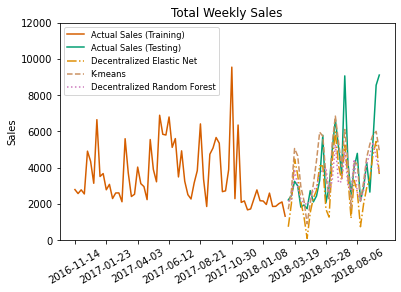

In [19]:
plt.rcParams.update({'font.size': 10})

plt.title('Total Weekly Sales')
plt.ylabel("Sales")

plt.plot(sum_train.iloc[:68]["week"],
         sum_train.train,
         label="Actual Sales (Training)",
         color=sns.color_palette(palette='colorblind')[3])

plt.plot(sum_pred["week"],
         sum_pred.actual,
         label="Actual Sales (Testing)",
         color=sns.color_palette(palette='colorblind')[2])

plt.plot(sum_pred["week"],
         sum_pred.decentralized_elasticnet,
         color=sns.color_palette(palette='colorblind')[1],
         label="Decentralized Elastic Net",
         linestyle='dashdot')

plt.plot(sum_pred["week"],
         sum_pred['K-means'],
         color=sns.color_palette(palette='colorblind')[5],
         label="K-means",
         linestyle='dashed')

plt.plot(sum_pred["week"],
         sum_pred['decentralized-RF'],
         color=sns.color_palette(palette='colorblind')[4],
         label="Decentralized Random Forest",
         linestyle=':')

plt.legend(loc='best',fontsize='small')
plt.ylim([0,12000])
locs, labels=plt.xticks()
x_ticks = []
plt.xticks(locs[0::10],data.week[0::10], rotation=30)

plt.savefig("total_predictions_comparison_full.png",dpi=400, bbox_inches = 'tight')
plt.show()

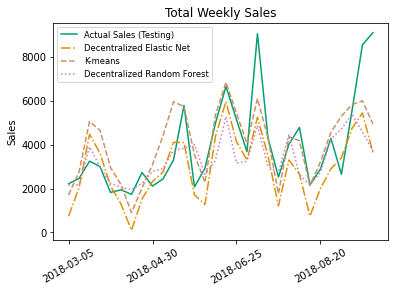

In [20]:
plt.rcParams.update({'font.size': 10})

plt.title('Total Weekly Sales')
plt.ylabel("Sales")

plt.plot(sum_pred["week"],
         sum_pred.actual,
         label="Actual Sales (Testing)",
         color=sns.color_palette(palette='colorblind')[2])

plt.plot(sum_pred["week"],
         sum_pred.decentralized_elasticnet,
         color=sns.color_palette(palette='colorblind')[1],
         label="Decentralized Elastic Net",
         linestyle='dashdot')

plt.plot(sum_pred["week"],
         sum_pred['K-means'],
         color=sns.color_palette(palette='colorblind')[5],
         label="K-means",
         linestyle='dashed')

plt.plot(sum_pred["week"],
         sum_pred['decentralized-RF'],
         color=sns.color_palette(palette='colorblind')[4],
         label="Decentralized Random Forest",
         linestyle=':')

plt.legend(loc='best',fontsize='small')
locs, labels=plt.xticks()
x_ticks = []
plt.xticks(locs[0::8],data.week.iloc[68:][0::8], rotation=30)

plt.savefig("total_predictions_comparison.png",dpi=400, bbox_inches = 'tight')
plt.show()

## 3. Robustness of the split ratio

In [22]:
res = pd.read_csv('robustness_test.csv')
res

,model,method_type,65-35%,70-30%,75-25%
0,Centralized,Traditional,0.107572,0.114249,0.115657
1,Decentralized,Traditional,0.421720,0.516539,0.554932
2,Decentralized Lasso,Traditional,0.441673,0.522894,0.558987
3,Decentralized Ridge,Traditional,0.541985,0.570888,0.594307
4,Decentralized Elasticnet,Traditional,0.560323,0.584669,0.608392
5,Decentralized Log Lin,Traditional,0.471659,0.558297,0.572345
6,Decentralized Log Log,Traditional,0.196727,0.199689,0.168926
7,Centralized DT,Tree-based,0.366419,0.159197,0.205364
8,Decentralized DT,Tree-based,0.475449,0.398779,0.449018
9,Centralized RF,Tree-based,0.344281,0.272476,0.368494


In [23]:
results = pd.melt(res,
                  id_vars=['model','method_type'],
                  value_vars=['65-35%','70-30%','75-25%'],
                  var_name='split',
                  value_name='OOS R2')
results

,model,method_type,split,OOS R2
0,Centralized,Traditional,65-35%,0.107572
1,Decentralized,Traditional,65-35%,0.421720
2,Decentralized Lasso,Traditional,65-35%,0.441673
3,Decentralized Ridge,Traditional,65-35%,0.541985
4,Decentralized Elasticnet,Traditional,65-35%,0.560323
5,Decentralized Log Lin,Traditional,65-35%,0.471659
6,Decentralized Log Log,Traditional,65-35%,0.196727
7,Centralized DT,Tree-based,65-35%,0.366419
8,Decentralized DT,Tree-based,65-35%,0.475449
9,Centralized RF,Tree-based,65-35%,0.344281


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

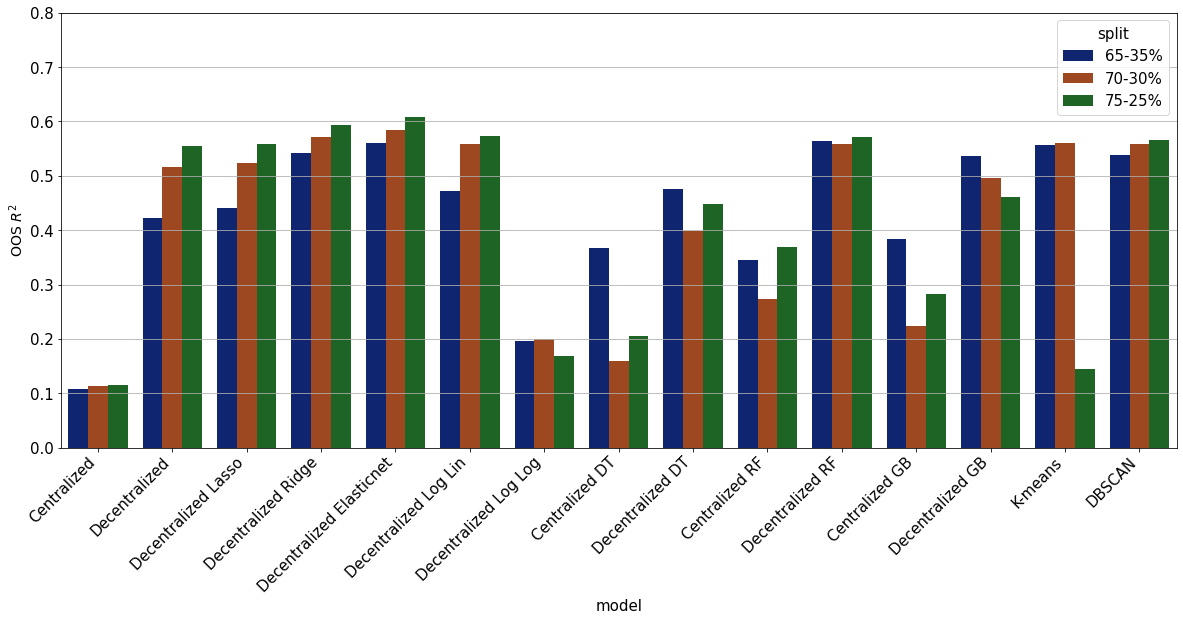

In [25]:
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(20,8))
g = sns.barplot(data=results, x='model', y='OOS R2', hue='split', palette='dark', ax=ax)
ax.set_ylabel('OOS $R^2$', size = 14)
ax.set_xticklabels(list(res.model),rotation=45,ha='right')
ax.set_ylim([0,0.8])
ax.yaxis.grid(True)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("robustness_test_plot.png",dpi=400,bbox_inches = 'tight')
plt.show()